In [1]:
import pandas as pd
import ast
import numpy as np
import pickle

In [2]:
from pathlib import Path
import sys
import matplotlib.pyplot as plt

import matplotlib.font_manager
from matplotlib.font_manager import FontProperties

import matplotlib as mpl
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
fpath = Path(mpl.get_data_path(), "/n/holylabs/LABS/extavour_lab/Users/rkapoor/envs/plot/fonts/arial.ttf")
from matplotlib.font_manager import FontProperties
from matplotlib import font_manager
plt.rcParams['figure.dpi'] = 300
font_path = "/n/holylabs/LABS/extavour_lab/Users/rkapoor/envs/plot/fonts/arial.ttf"
font_manager.fontManager.addfont("/n/holylabs/LABS/extavour_lab/Users/rkapoor/envs/plot/fonts/arial.ttf")
prop = font_manager.FontProperties(fname=font_path)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = prop.get_name()
plt.rcParams['svg.fonttype']='none'

In [3]:
from collections import Counter

In [4]:
df=pd.read_csv("data_upload_3_24_2025/Supplementary Table XV_ GO annotations - manual_GO_annotations .tsv", sep="\t")

In [21]:
go_meta=[]
go_hgt=[]
for index, row in df.iterrows():
    l=ast.literal_eval(row.molecular_functions.strip())
    l.extend(ast.literal_eval(row.biological_process.strip()))
    if row.annotation=='Meta':
        go_meta.extend(l)
    else:
        go_hgt.extend(l)
fm=dict(Counter([x for x in go_meta if "F:" in x]))
pm=dict(Counter([x for x in go_meta if "P:" in x]))
#remove redundant annotations before plotting 
pm_plot={x:pm[x] for x in pm if (pm[x]>1 and x not in ['P:regulation of gene expression','P:cellular process','P:DNA replication initiation','P:regulation of transcription by RNA polymerase II','P:metabolic process','P:peptidyl-arginine methylation','P:peptidyl-arginine methylation']) or x in ['P:defense response to bacterium','P:one-carbon metabolic process','P:glycogen metabolic process','P:pole cell formation','P:chitin-based cuticle attachment to epithelium','P:DNA integration','P:lipid metabolic process','P:protein ubiquitination','P:UDP-galactose transmembrane transport']}
fm_plot={x:fm[x] for x in fm if (x not in ['F:nucleotide binding', 'F:ubiquitin-protein transferase','F:binding','F:nucleic acid binding','F:metal ion binding', 'F:catalytic activity'] and fm[x]>1) or x in ['F:galactoside binding','F:phospholipase activity','F:laminin binding', 'F:transmembrane transporter activity',  'F:histone H3K4me/H3K4me2/H3K4me3 demethylase activity','F:receptor tyrosine kinase binding','F:mRNA binding','F:translation initiation factor activity','F:UTP:glucose-1-phosphate uridylyltransferase activity','F:gamma-glutamylcyclotransferase activity']}


In [25]:
fh=dict(Counter([x for x in go_hgt if "F:" in x]))
ph=dict(Counter([x for x in go_hgt if "P:" in x]))
#remove redundant annotations before plotting 
fh_plot={x:fh[x] for x in fh if  fh[x]>1 or x in ['F:catalytic activity','F:sugar-phosphatase activity', 'F:nucleic acid binding', 'F:epoxide hydrolase activity','F:leucine-tRNA ligase activity', 'F:chitinase activity','F:15-cis-phytoene synthase activity','F:haloalkane dehalogenase activity','F:RNA helicase activity','F:calcium ion binding','F:zinc ion binding','F:farnesyltranstransferase activity','F:epoxide hydrolase activity','F:cellulase activity','F:methylenetetrahydrofolate dehydrogenase (NAD+) activity']}
ph_plot={x:ph[x] for x in ph if x not in ["P:RNA 5'-cap (guanine-N7)-methylation", 'P:DNA integration','P:DNA recombination','P:DNA transposition', 'P:cell division','P:phosphate ion transport','P:cellular process','P:tRNA metabolic process', 'P:leucyl-tRNA aminoacylation', 'P:transposition']}

## Supplemental figure 

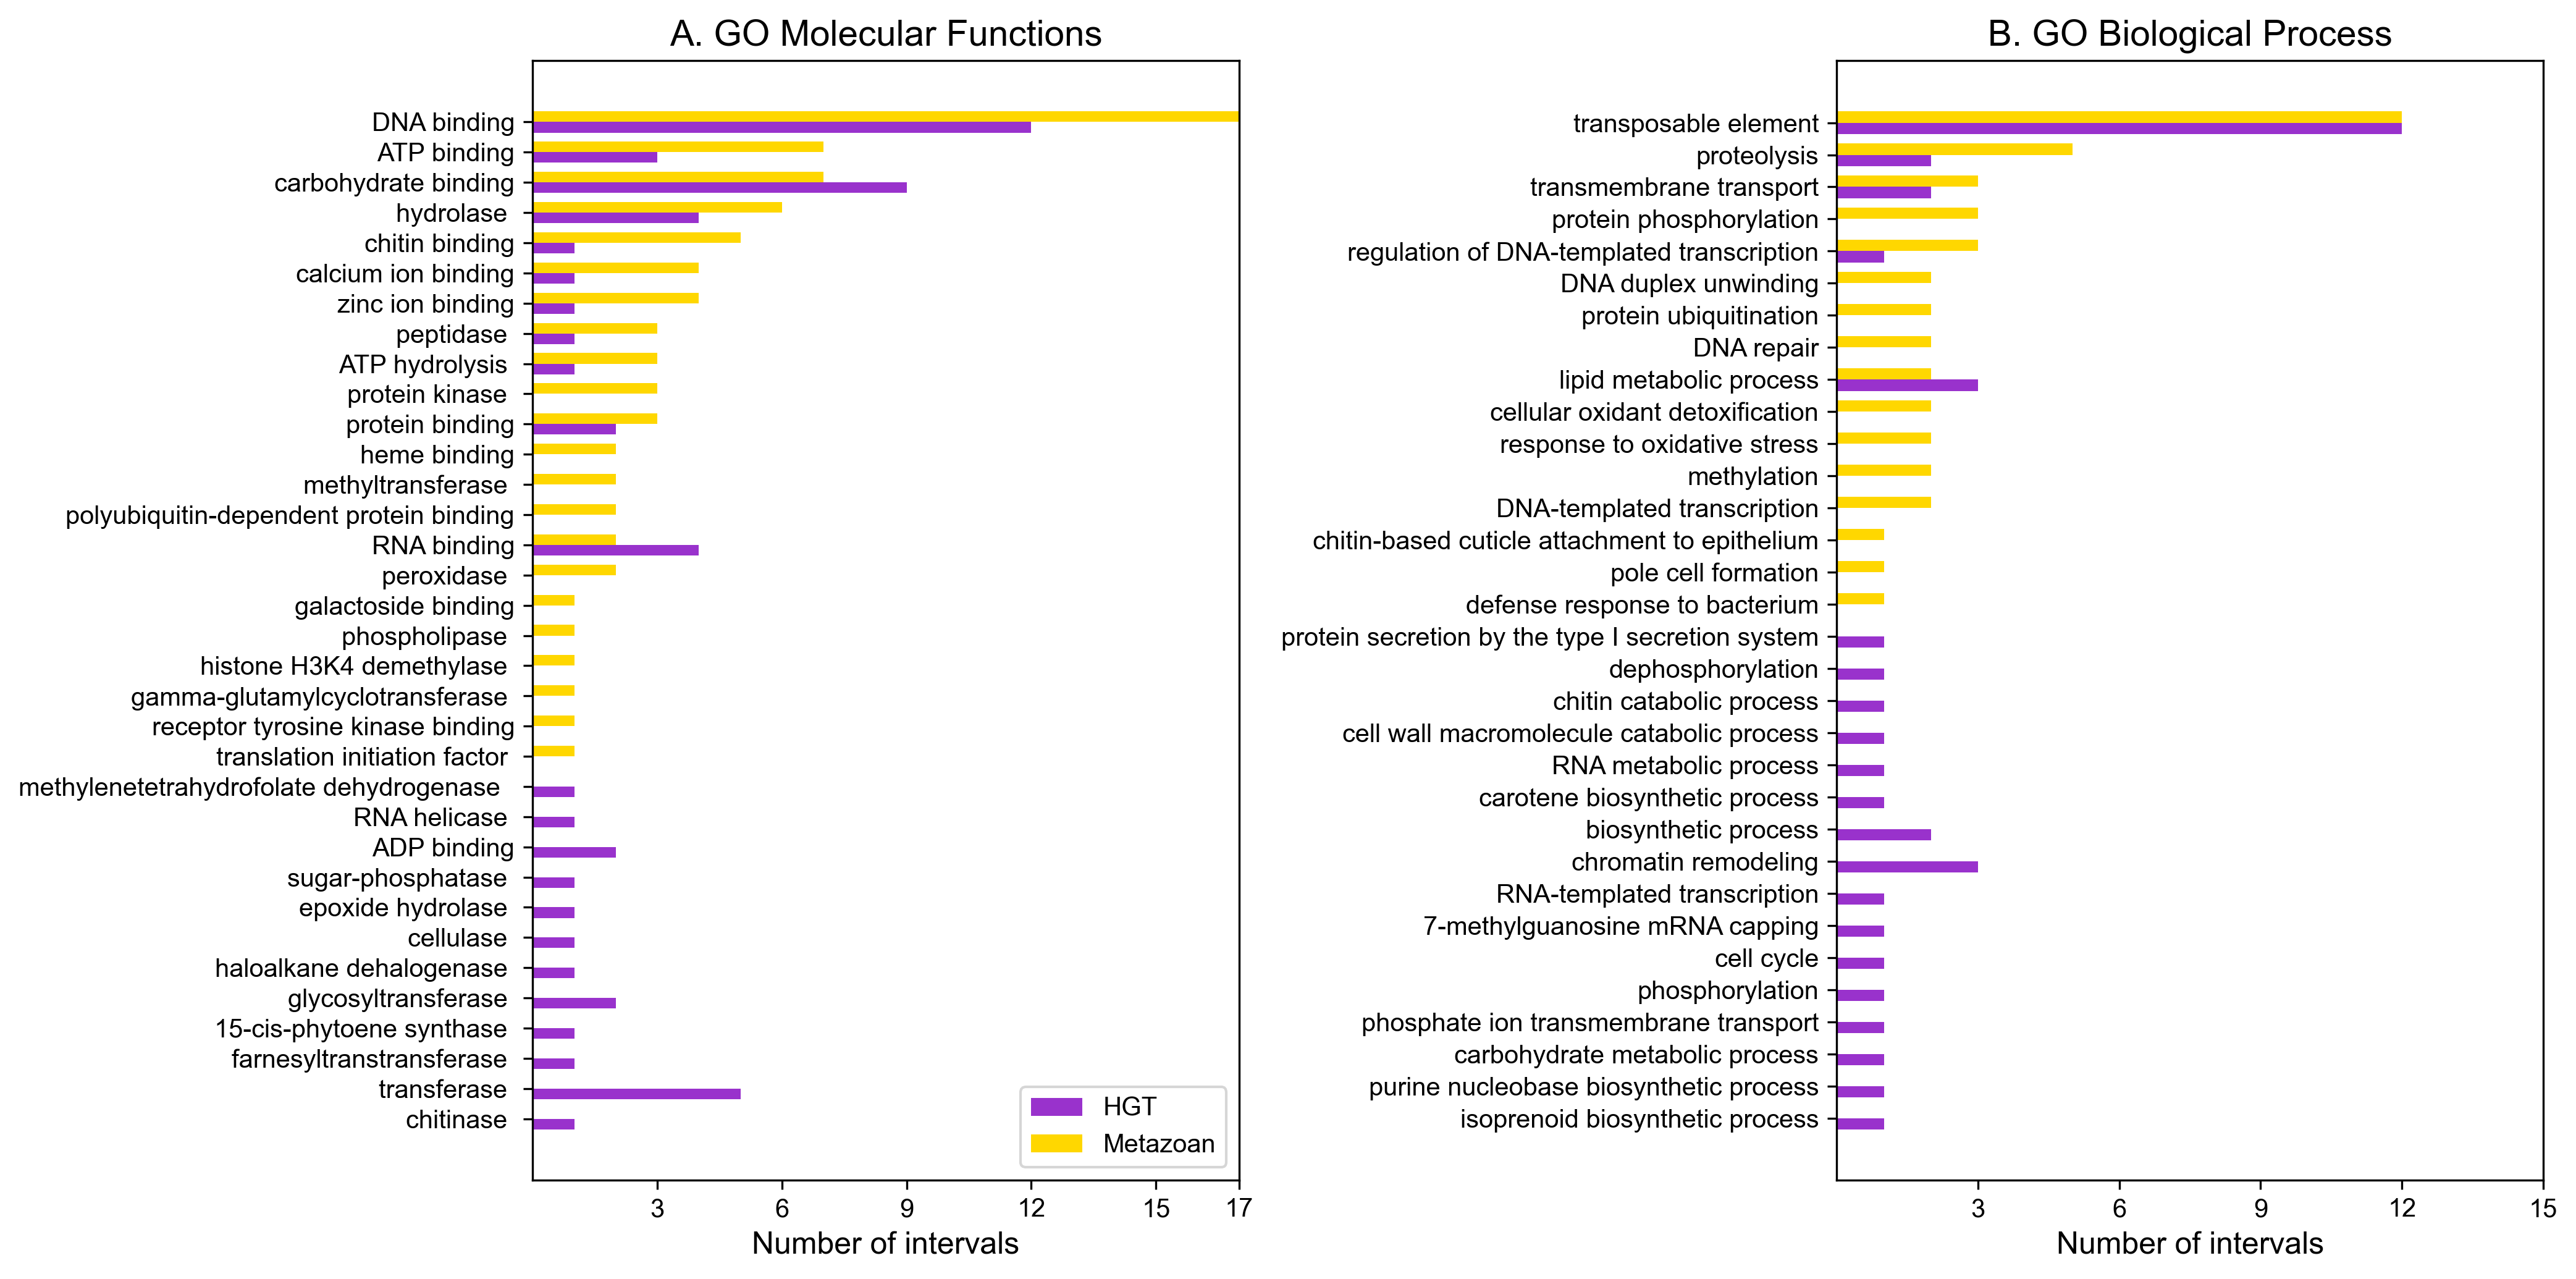

In [26]:
fig,ax=plt.subplots(1,2,figsize=(14, 7))
categories=[]
values_h=[]
values_m=[]
for x in fm_plot|fh_plot:
    if x not in ['F:nucleic acid binding','F:mRNA binding','F:transmembrane transporter activity', 'F:ubiquitin protein ligase', 'F:catalytic activity']:
        if x in fm:
            values_m.append(fm[x])
        else:
            values_m.append(0)
        if x in fh:
            values_h.append(fh[x])
        else:
            values_h.append(0)
        categories.append(x)
categories=[x.replace("F:DNA-binding transcription factor activity, RNA polymerase II-specific","F:DNA-binding transcription factor activity").replace('F:histone H3K4me/H3K4me2/H3K4me3 demethylase activity', 'F:histone H3K4 demethylase activity').replace("F:", "").replace("activity","").replace("(NAD+)","").replace('K63-linked polyubiquitin modification-dependent protein binding','polyubiquitin-dependent protein binding') for x in categories]
# Sort the data and categories by the length of Metazoan bars
sorted_indices = np.argsort(values_m)
categories_sorted = [categories[i] for i in sorted_indices]
values_h_sorted = [values_h[i] for i in sorted_indices]
values_m_sorted = [values_m[i] for i in sorted_indices]

data1 = values_h_sorted  # First dataset
data2 = values_m_sorted  # Second dataset

# Define the height of the bars
bar_height = 0.35

# Set the position of the bars on the y-axis
y = np.arange(len(categories_sorted))

# Plotting the bars horizontally
ax[0].barh(y, data1, height=bar_height, color='darkorchid', label='HGT')
ax[0].barh(y + bar_height, data2, height=bar_height, color='gold', label='Metazoan')


# Customize the plot
ax[0].set_xlabel('Number of intervals', fontsize=12)
ax[0].set_title('A. GO Molecular Functions', fontsize=14)
ax[0].set_yticks(y + bar_height / 2, categories_sorted)  # Adjust y-axis ticks position

# Make x-axis ticks integers
ticks = np.arange(0, 20 + 1, 1)
ax[0].set_xticks([3,6,9,12,15,17])
ax[0].set_xlim(0,17)
ax[0].legend()


pm_plot={x:pm[x] for x in pm if (pm[x]>1 and x not in ['P:regulation of gene expression','P:cellular process','P:DNA replication initiation','P:regulation of transcription by RNA polymerase II','P:metabolic process','P:peptidyl-arginine methylation','P:peptidyl-arginine methylation',]) or x in ['P:defense response to bacterium','P:one-carbon metabolic process','P:glycogen metabolic process','P:pole cell formation','P:chitin-based cuticle attachment to epithelium','P:DNA integration','P:lipid metabolic process','P:protein ubiquitination','P:UDP-galactose transmembrane transport']}
ph_plot={x:ph[x] for x in ph if x not in ["P:RNA 5'-cap (guanine-N7)-methylation", 'P:DNA integration','P:DNA recombination','P:DNA transposition', 'P:cell division','P:phosphate ion transport','P:cellular process','P:tRNA metabolic process', 'P:leucyl-tRNA aminoacylation', 'P:transposition']}
categories=[]
values_h=[]
values_m=[]
for x in pm_plot|ph_plot:
    if x not in ['P:isoprenoid biosynthetetic process', 'P:DNA integration']:
        if x in pm_plot:
            values_m.append(pm_plot[x])
        else:
            values_m.append(0)
        if x in ph_plot:
            values_h.append(ph_plot[x])
        else:
            values_h.append(0)
        categories.append(x)
categories=[x.replace("P:", "") for x in categories]
# Sort the data and categories by the length of Metazoan bars
sorted_indices = np.argsort(values_m)
categories_sorted = [categories[i] for i in sorted_indices]
values_h_sorted = [values_h[i] for i in sorted_indices]
values_m_sorted = [values_m[i] for i in sorted_indices]

data1 = values_h_sorted  # First dataset
data2 = values_m_sorted  # Second dataset

# Define the height of the bars
bar_height = 0.35

# Set the position of the bars on the y-axis
y = np.arange(len(categories_sorted))
# Plotting the bars horizontally
ax[1].barh(y, data1, height=bar_height, color='darkorchid', label='HGT')
ax[1].barh(y + bar_height, data2, height=bar_height, color='gold', label='Metazoan')


# Customize the plot
ax[1].set_xlabel('Number of intervals', fontsize=12)
ax[1].set_title('B. GO Biological Process', fontsize=14)
ax[1].set_yticks(y + bar_height / 2, categories_sorted)  # Adjust y-axis ticks position

# Make x-axis ticks integers
ticks = np.arange(0, 20 + 1, 1)
ax[1].set_xticks([3,6,9,12,15])
ax[1].set_xlim(0,15)


plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.savefig('Fig8_combined.png', format='png',dpi=300)  # Save the plot as an image
plt.savefig('Fig8_combined.svg', format='svg',dpi=300)  # Save the plot as an image
plt.show()